<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_Modeling_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('2013_Prep.csv')

In [3]:
df

,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,season,Date_time,TS1_P1_data,Wx,Wy
0,357,27,1007,76,25,79,Summer,1/1/2013 5:57,24,0.209397,5.996345
1,358,27,1007,76,25,83,Summer,1/1/2013 5:58,26,0.209397,5.996345
2,359,27,1007,76,25,84,Summer,1/1/2013 5:59,23,0.279196,7.995127
3,360,27,1007,76,25,86,Summer,1/1/2013 6:00,24,2.150208,5.601483
4,361,27,1007,76,25,88,Summer,1/1/2013 6:01,25,1.026060,2.819078
...,...,...,...,...,...,...,...,...,...,...,...
157790,437982,25,1010,65,22,21,Spring,11/12/2013 18:30,6,-7.853017,-1.526472
157791,437983,25,1010,65,22,19,Spring,11/12/2013 18:31,6,-13.119296,-7.272144
157792,437984,25,1010,65,22,19,Spring,11/12/2013 18:32,4,-10.495436,-5.817715
157793,437985,24,1010,65,22,18,Spring,11/12/2013 18:33,4,-7.714506,-4.635343


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157795 entries, 0 to 157794
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   157795 non-null  int64  
 1   TS1_SENS0700_TmpMdul_C_data  157795 non-null  int64  
 2   Barometer_data               157795 non-null  int64  
 3   Outside_Humidity_data        157795 non-null  int64  
 4   Outside_Temperature_data     157795 non-null  int64  
 5   Solar_Radiation_data         157795 non-null  int64  
 6   season                       157795 non-null  object 
 7   Date_time                    157795 non-null  object 
 8   TS1_P1_data                  157795 non-null  int64  
 9   Wx                           157795 non-null  float64
 10  Wy                           157795 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 13.2+ MB


In [5]:
df['Date_time'] = pd.to_datetime(df['Date_time'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b047a6fd0>,
      dtype=object)

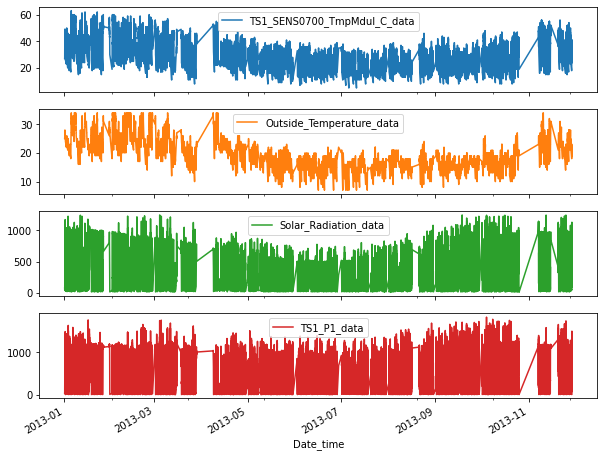

In [6]:
df.set_index('Date_time')[['TS1_SENS0700_TmpMdul_C_data', 'Outside_Temperature_data','Solar_Radiation_data','TS1_P1_data']].plot(subplots=True)

In [7]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'Date_time', 'TS1_P1_data', 'Wx',
       'Wy'],
      dtype='object')

In [8]:
df=df[::5]
df

,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,season,Date_time,TS1_P1_data,Wx,Wy
0,357,27,1007,76,25,79,Summer,2013-01-01 05:57:00,24,0.209397,5.996345
5,362,27,1007,76,25,90,Summer,2013-01-01 06:02:00,25,2.052121,5.638156
10,367,27,1007,76,26,95,Summer,2013-01-01 06:07:00,30,1.530904,10.892949
15,372,28,1007,75,26,105,Summer,2013-01-01 06:12:00,41,0.209397,5.996345
20,377,28,1007,75,26,123,Summer,2013-01-01 06:17:00,46,-1.041889,5.908847
...,...,...,...,...,...,...,...,...,...,...,...
157770,437960,32,1010,63,23,60,Spring,2013-11-12 18:08:00,454,-18.895916,1.986041
157775,437965,31,1010,63,23,51,Spring,2013-11-12 18:13:00,396,-13.993915,-7.756954
157780,437971,28,1010,64,22,39,Spring,2013-11-12 18:19:00,176,-9.428840,-5.665419
157785,437977,27,1010,65,22,28,Spring,2013-11-12 18:25:00,34,-20.128094,-13.071337


In [9]:
date_time = pd.to_datetime(df.pop('Date_time'), format='%d/%m/%Y %H:%M')
date_time

0        2013-01-01 05:57:00
5        2013-01-01 06:02:00
10       2013-01-01 06:07:00
15       2013-01-01 06:12:00
20       2013-01-01 06:17:00
                 ...        
157770   2013-11-12 18:08:00
157775   2013-11-12 18:13:00
157780   2013-11-12 18:19:00
157785   2013-11-12 18:25:00
157790   2013-11-12 18:30:00
Name: Date_time, Length: 31559, dtype: datetime64[ns]

In [10]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [11]:
import numpy as np
day = 24*60*5
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

<ipython-input-11-1fe7526918b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
<ipython-input-11-1fe7526918b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
<ipython-input-11-1fe7526918b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [12]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'TS1_P1_data', 'Wx', 'Wy', 'Day sin',
       'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [13]:
df_input =df[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [14]:
df_input.shape

(31559, 12)

In [15]:
df_input= df_input.loc[df['TS1_P1_data']<=1150]

In [16]:
df_input.shape

(27872, 12)

In [17]:
df_input= df_input.loc[df['TS1_P1_data']>10]

In [18]:
df_input.shape

(27396, 12)

In [19]:
df_input.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,0.017922,-1.412544
TS1_SENS0700_TmpMdul_C_data,0.443570,-0.200824
Barometer_data,0.115788,-0.526060
Outside_Humidity_data,-0.228981,-0.373652
Outside_Temperature_data,0.528864,-0.078324
Solar_Radiation_data,0.671588,-0.264922
Wx,0.146187,-0.162903
Wy,-0.074107,-0.102559
Day sin,-0.042552,-1.501771
Day cos,-0.011736,-1.496727


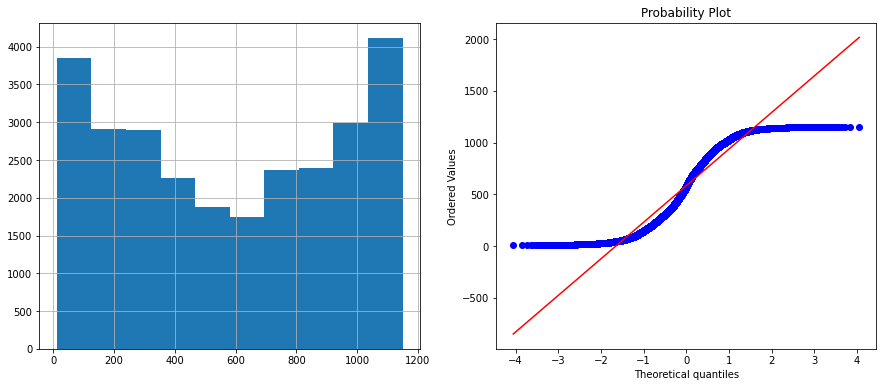

In [20]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(df_input,'TS1_P1_data')

In [21]:
df_input

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos
0,24,27,1007,76,25,79,0.209397,5.996345,-0.156434,0.987688,0.168553,0.985693
5,25,27,1007,76,25,90,2.052121,5.638156,0.104528,0.994522,0.169259,0.985572
10,30,27,1007,76,26,95,1.530904,10.892949,0.358368,0.933580,0.169966,0.985450
15,41,28,1007,75,26,105,0.209397,5.996345,0.587785,0.809017,0.170672,0.985328
20,46,28,1007,75,26,123,-1.041889,5.908847,0.777146,0.629320,0.171378,0.985205
...,...,...,...,...,...,...,...,...,...,...,...,...
157765,503,32,1010,63,23,74,-13.991472,0.488593,0.156434,0.987688,0.623734,-0.781637
157770,454,32,1010,63,23,60,-18.895916,1.986041,0.406737,0.913545,0.623173,-0.782084
157775,396,31,1010,63,23,51,-13.993915,-7.756954,0.629320,0.777146,0.622612,-0.782530
157780,176,28,1010,64,22,39,-9.428840,-5.665419,0.838671,0.544639,0.621939,-0.783066


In [22]:
df_input.describe()

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos
count,27396.000000,27396.000000,27396.000000,27396.000000,27396.000000,27396.000000,27396.000000,27396.000000,27396.000000,2.739600e+04,27396.000000,27396.000000
mean,582.304424,31.031793,1015.506935,62.338590,20.104723,368.815557,0.025575,2.158289,0.018741,7.153951e-03,0.021494,-0.075363
std,367.876539,9.995902,5.852222,16.710879,5.289510,241.341067,7.766063,6.277468,0.708157,7.057954e-01,0.736967,0.671398
min,11.000000,5.000000,1001.000000,15.000000,7.000000,16.000000,-23.482776,-14.184194,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,242.000000,24.000000,1011.000000,52.000000,17.000000,171.000000,-5.540953,-0.835039,-0.707107,-7.071068e-01,-0.768879,-0.725514
50%,575.000000,30.000000,1015.000000,63.000000,19.000000,327.000000,0.000000,1.854102,0.052336,5.240713e-11,0.129378,-0.122928
75%,933.250000,37.000000,1019.000000,74.000000,23.000000,520.000000,5.523029,6.304086,0.743145,7.071068e-01,0.755056,0.573043
max,1150.000000,63.000000,1030.000000,97.000000,34.000000,1239.000000,23.070281,18.912258,1.000000,1.000000e+00,1.000000,1.000000


In [23]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [24]:
data_scaled

array([[0.01141352, 0.37931034, 0.20689655, ..., 0.99384417, 0.58427643,
        0.99284631],
       [0.01229148, 0.37931034, 0.20689655, ..., 0.99726095, 0.58462967,
        0.99278578],
       [0.0166813 , 0.37931034, 0.20689655, ..., 0.96679021, 0.58498287,
        0.99272499],
       ...,
       [0.3380158 , 0.44827586, 0.31034483, ..., 0.88857298, 0.81130619,
        0.1087348 ],
       [0.14486392, 0.39655172, 0.31034483, ..., 0.77231952, 0.81096953,
        0.10846718],
       [0.02019315, 0.37931034, 0.31034483, ..., 0.62940952, 0.81063264,
        0.10819985]])

In [25]:
features=data_scaled
target=data_scaled[:,0]

In [26]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.01141352, 0.37931034, 0.20689655, 0.74390244, 0.66666667,
          0.05151267, 0.50892841, 0.60974931, 0.42178277, 0.99384417,
          0.58427643, 0.99284631],
         [0.01229148, 0.37931034, 0.20689655, 0.74390244, 0.66666667,
          0.06050695, 0.54851171, 0.59892672, 0.55226423, 0.99726095,
          0.58462967, 0.99278578]]]), array([0.0166813]))

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [28]:
x_train.shape

(21916, 12)

In [29]:
x_test.shape

(5480, 12)

In [30]:
win_length=720
batch_size=32
num_features=12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [31]:
train_generator[0]

(array([[[1.14135206e-02, 3.79310345e-01, 2.06896552e-01, ...,
          9.93844170e-01, 5.84276430e-01, 9.92846311e-01],
         [1.22914838e-02, 3.79310345e-01, 2.06896552e-01, ...,
          9.97260948e-01, 5.84629672e-01, 9.92785777e-01],
         [1.66812994e-02, 3.79310345e-01, 2.06896552e-01, ...,
          9.66790213e-01, 5.84982871e-01, 9.92724989e-01],
         ...,
         [0.00000000e+00, 3.79310345e-01, 2.41379310e-01, ...,
          9.56772729e-01, 6.91264316e-01, 3.80281805e-02],
         [9.65759438e-02, 3.44827586e-01, 2.75862069e-01, ...,
          7.72319518e-01, 6.40791875e-01, 2.02316717e-02],
         [1.13257243e-01, 3.62068966e-01, 2.75862069e-01, ...,
          6.54508497e-01, 6.40447949e-01, 2.01308778e-02]],
 
        [[1.22914838e-02, 3.79310345e-01, 2.06896552e-01, ...,
          9.97260948e-01, 5.84629672e-01, 9.92785777e-01],
         [1.66812994e-02, 3.79310345e-01, 2.06896552e-01, ...,
          9.66790213e-01, 5.84982871e-01, 9.92724989e-01],
       

In [32]:
from keras.regularizers import L1L2
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))#,kernel_regularizer = L1L2(l1=0.02, l2=0.00)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          72192     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [34]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MAPE])

history = model.fit_generator(train_generator, epochs=5,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/5


<ipython-input-34-49d8a18870f3>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5,


663/663 [==============================] - 74s 102ms/step - loss: 0.0554 - mean_absolute_percentage_error: 344769.3125 - val_loss: 0.0421 - val_mean_absolute_percentage_error: 123589.7578
Epoch 2/5
663/663 [==============================] - 59s 89ms/step - loss: 0.0323 - mean_absolute_percentage_error: 203115.3906 - val_loss: 0.0290 - val_mean_absolute_percentage_error: 86577.7344
Epoch 3/5
663/663 [==============================] - 58s 88ms/step - loss: 0.0280 - mean_absolute_percentage_error: 162001.2812 - val_loss: 0.0272 - val_mean_absolute_percentage_error: 62276.1562
Epoch 4/5
663/663 [==============================] - 58s 87ms/step - loss: 0.0270 - mean_absolute_percentage_error: 129427.8828 - val_loss: 0.0271 - val_mean_absolute_percentage_error: 72173.0391
Epoch 5/5
663/663 [==============================] - 59s 89ms/step - loss: 0.0264 - mean_absolute_percentage_error: 134684.1250 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 57375.7695


In [35]:
model.evaluate_generator(test_generator, verbose=0)  

<ipython-input-35-ef1e1eabfd74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.026428859680891037, 57375.76953125]

In [36]:
predictions=model.predict_generator(test_generator)

<ipython-input-36-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [37]:
predictions.shape[0]

4760

In [38]:
predictions

array([[0.31097996],
       [0.3063261 ],
       [0.36618972],
       ...,
       [0.3366574 ],
       [0.29449707],
       [0.14648212]], dtype=float32)

In [39]:
y_test

array([0.98244074, 0.9833187 , 0.98156277, ..., 0.3380158 , 0.14486392,
       0.02019315])

In [40]:
x_test

array([[0.98244074, 0.72413793, 0.44827586, ..., 0.97552826, 0.91077037,
        0.2149251 ],
       [0.9833187 , 0.74137931, 0.44827586, ..., 0.99931477, 0.91056593,
        0.21463074],
       [0.98156277, 0.74137931, 0.44827586, ..., 0.9890738 , 0.91036128,
        0.21433653],
       ...,
       [0.3380158 , 0.44827586, 0.31034483, ..., 0.88857298, 0.81130619,
        0.1087348 ],
       [0.14486392, 0.39655172, 0.31034483, ..., 0.77231952, 0.81096953,
        0.10846718],
       [0.02019315, 0.37931034, 0.31034483, ..., 0.62940952, 0.81063264,
        0.10819985]])

In [41]:
x_test[:,1:][win_length:]

array([[0.25862069, 0.27586207, 0.95121951, ..., 0.99726095, 0.9592343 ,
        0.30225304],
       [0.27586207, 0.24137931, 0.95121951, ..., 0.96679021, 0.95909244,
        0.30192392],
       [0.29310345, 0.24137931, 0.95121951, ..., 0.9045085 , 0.95895034,
        0.3015949 ],
       ...,
       [0.44827586, 0.31034483, 0.58536585, ..., 0.88857298, 0.81130619,
        0.1087348 ],
       [0.39655172, 0.31034483, 0.59756098, ..., 0.77231952, 0.81096953,
        0.10846718],
       [0.37931034, 0.31034483, 0.6097561 , ..., 0.62940952, 0.81063264,
        0.10819985]])

In [42]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [43]:
df_pred

,0,0,1,2,3,4,5,6,7,8,9,10
0,0.310980,0.258621,0.275862,0.951220,0.333333,0.197874,0.641134,0.620857,0.552264,0.997261,0.959234,0.302253
1,0.306326,0.275862,0.241379,0.951220,0.333333,0.241210,0.593962,0.558979,0.679184,0.966790,0.959092,0.301924
2,0.366190,0.293103,0.241379,0.951220,0.333333,0.182339,0.519352,0.450306,0.793893,0.904508,0.958950,0.301595
3,0.307652,0.275862,0.241379,0.951220,0.333333,0.169256,0.504430,0.428571,0.888573,0.814660,0.958808,0.301266
4,0.299998,0.293103,0.241379,0.951220,0.370370,0.212592,0.659450,0.679408,0.956773,0.703368,0.958665,0.300937
...,...,...,...,...,...,...,...,...,...,...,...,...
4755,0.432529,0.465517,0.310345,0.585366,0.592593,0.047424,0.203881,0.443334,0.578217,0.993844,0.811867,0.109181
4756,0.381097,0.465517,0.310345,0.585366,0.592593,0.035977,0.098530,0.488579,0.703368,0.956773,0.811587,0.108958
4757,0.336657,0.448276,0.310345,0.585366,0.592593,0.028618,0.203829,0.194197,0.814660,0.888573,0.811306,0.108735
4758,0.294497,0.396552,0.310345,0.597561,0.555556,0.018806,0.301891,0.257392,0.919335,0.772320,0.810970,0.108467


In [44]:
rev_trans=scaler.inverse_transform(df_pred)

In [45]:
rev_trans

array([[ 3.65206177e+02,  2.00000000e+01,  1.00900000e+03, ...,
         9.94521895e-01,  9.18468594e-01, -3.95493922e-01],
       [ 3.59905418e+02,  2.10000000e+01,  1.00800000e+03, ...,
         9.33580426e-01,  9.18184875e-01, -3.96152163e-01],
       [ 4.28090089e+02,  2.20000000e+01,  1.00800000e+03, ...,
         8.09016994e-01,  9.17900684e-01, -3.96810199e-01],
       ...,
       [ 3.94452784e+02,  3.10000000e+01,  1.01000000e+03, ...,
         7.77145962e-01,  6.22612379e-01, -7.82530399e-01],
       [ 3.46432166e+02,  2.80000000e+01,  1.01000000e+03, ...,
         5.44639035e-01,  6.21939064e-01, -7.83065643e-01],
       [ 1.77843140e+02,  2.70000000e+01,  1.01000000e+03, ...,
         2.58819045e-01,  6.21265289e-01, -7.83600307e-01]])

In [46]:
predictions.shape

(4760, 1)

In [47]:
df_final=df_input[predictions.shape[0]*-1:]

In [48]:
df_final.count()

TS1_P1_data                    4760
TS1_SENS0700_TmpMdul_C_data    4760
Barometer_data                 4760
Outside_Humidity_data          4760
Outside_Temperature_data       4760
Solar_Radiation_data           4760
Wx                             4760
Wy                             4760
Day sin                        4760
Day cos                        4760
Year sin                       4760
Year cos                       4760
dtype: int64

In [49]:
df_final['pred']=rev_trans[:,0]

<ipython-input-49-b1d36e152cae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred']=rev_trans[:,0]


In [50]:
dd=df_final[['TS1_P1_data','pred']]

In [51]:
df_final.columns

Index(['TS1_P1_data', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'Wx', 'Wy', 'Day sin', 'Day cos', 'Year sin',
       'Year cos', 'pred'],
      dtype='object')

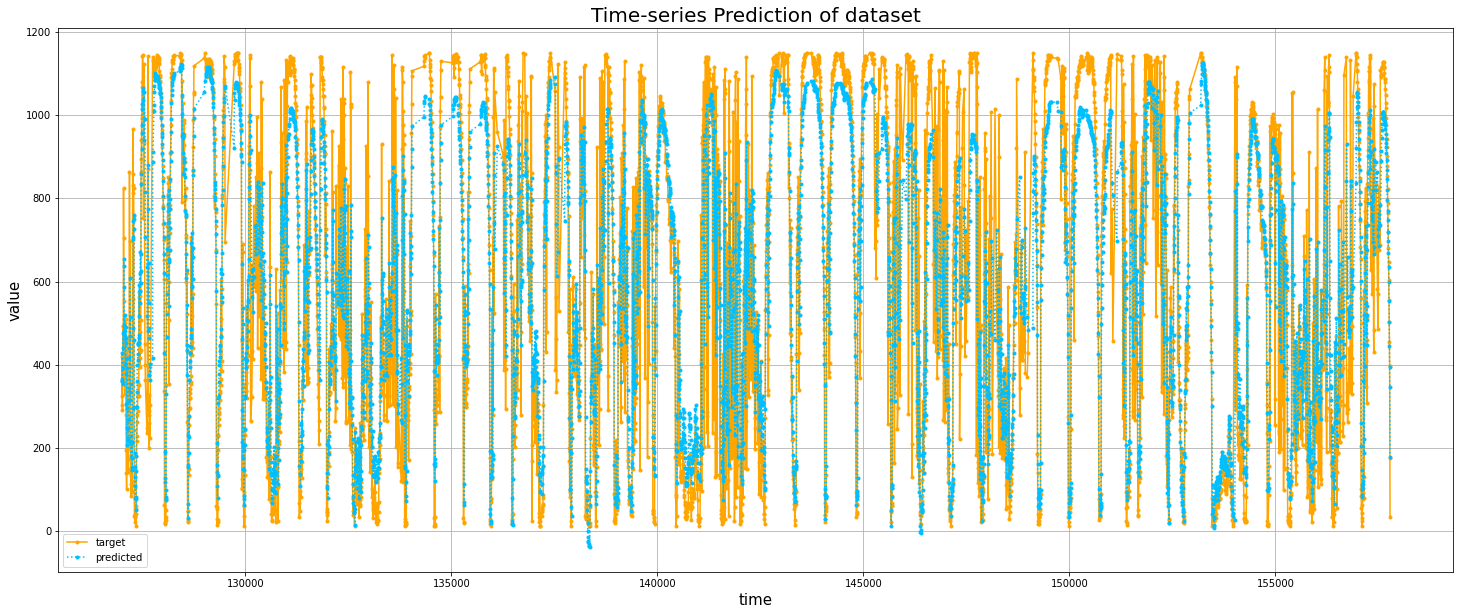

Prediction plot is saved to./predictionPlot.png


In [52]:
#algorithm= net.name
plt.figure(figsize=(25,10))
targetPlot,=plt.plot(df_final.TS1_P1_data,label='target',color='orange',marker='.',linestyle='-')
predictedPlot,=plt.plot(df_final.pred,label='predicted',color='deepskyblue',marker='.',linestyle=':')
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('value',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ion()
plt.grid()
plt.legend(handles=[targetPlot, predictedPlot])
plt.title('Time-series Prediction of dataset',fontsize=20,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

In [53]:
df_final

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos,pred
127000,326,20,1009,93,16,258,6.363961,6.363961,0.104528,0.994522,0.918469,-0.395494,365.206177
127005,418,21,1008,93,16,311,4.167950,4.316039,0.358368,0.933580,0.918185,-0.396152,359.905418
127010,304,22,1008,93,16,239,0.694658,0.719340,0.587785,0.809017,0.917901,-0.396810,428.090089
127015,290,21,1008,93,16,223,0.000000,0.000000,0.777146,0.629320,0.917616,-0.397468,361.416031
127020,357,22,1008,93,17,276,7.216649,8.301805,0.913545,0.406737,0.917331,-0.398126,352.697705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157765,503,32,1010,63,23,74,-13.991472,0.488593,0.156434,0.987688,0.623734,-0.781637,503.650092
157770,454,32,1010,63,23,60,-18.895916,1.986041,0.406737,0.913545,0.623173,-0.782084,445.069097
157775,396,31,1010,63,23,51,-13.993915,-7.756954,0.629320,0.777146,0.622612,-0.782530,394.452784
157780,176,28,1010,64,22,39,-9.428840,-5.665419,0.838671,0.544639,0.621939,-0.783066,346.432166


In [54]:
pred=df_final['pred']
power=df_final['TS1_P1_data']

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 130.9960
Root Mean Square Error: 185.1667
Root Mean Square Error_LOG: 5.2213
Mean Square Error: 34286.7131
r_2 score:0.6553
MAPE score:35.8654

